## Importing  Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
Sd=StandardScaler()
import warnings
warnings.filterwarnings('ignore')

In [3]:
cars = pd.read_csv('carsEDA.csv')
cars.head(7)

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699,594699,Sep,11626
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799,454899,Jan,8893
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099,193099,Aug,3775
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699,256699,Jul,5019
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,MANUAL,4022,Petrol,1st Owner,MH-12,Pune,1213099,1213099,Dec,22781
5,Skoda Rapid AMBITION 1.6 MPFI MT,2017,Skoda,MANUAL,46204,Petrol,1st Owner,KL-07,Kochi,611199,611199,Apr,11949
6,Volkswagen Polo HIGHLINE1.2L PETROL,2013,Volkswagen,MANUAL,39352,Petrol,2nd Owner,MH-01,Mumbai,388299,388299,Apr,7591


## Visualization:

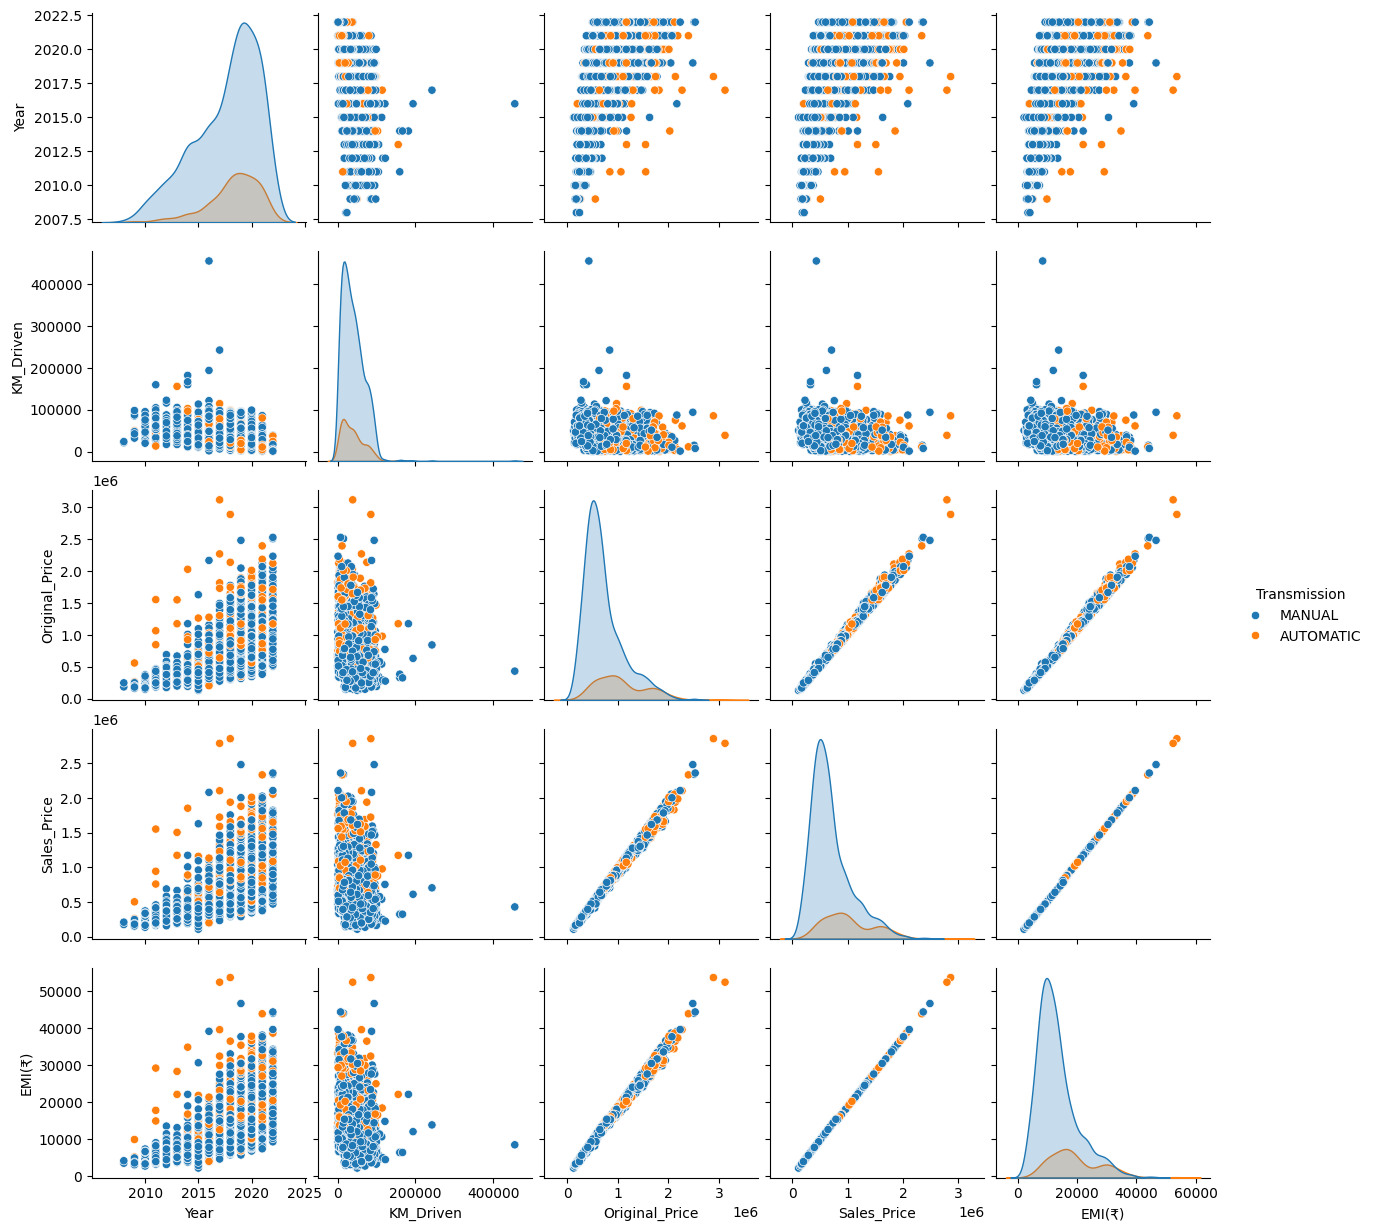

In [4]:
sns.pairplot(cars, hue='Transmission')

In [5]:
# Mapping month names to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

cars['Month'] = cars['Month'].map(month_mapping)


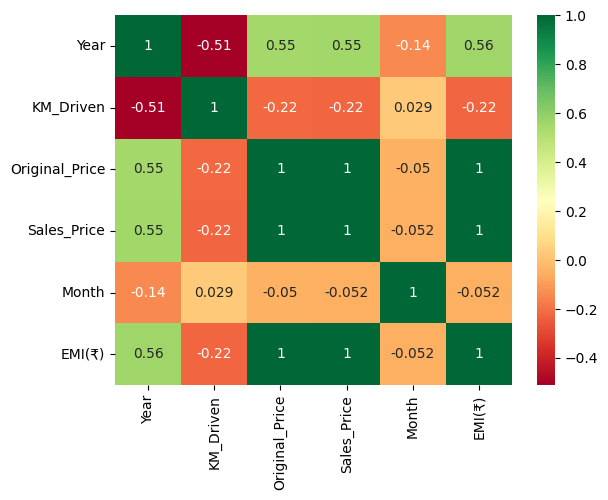

In [6]:
numeric_data = cars.select_dtypes(include=['number'])
corrmat = numeric_data.corr()
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

### Checking relationship of Company with Sales Price

In [7]:
cars['Company'].unique()

array(['Maruti', 'Hyundai', 'Mahindra', 'Skoda', 'Volkswagen', 'Ford',
       'Tata', 'Renault', 'Toyota', 'MG', 'Honda', 'Nissan', 'KIA',
       'Jeep', 'SKODA', 'Jaguar', 'Datsun', 'MARUTI', 'Mercedes', 'Fiat',
       'Chevrolet'], dtype=object)

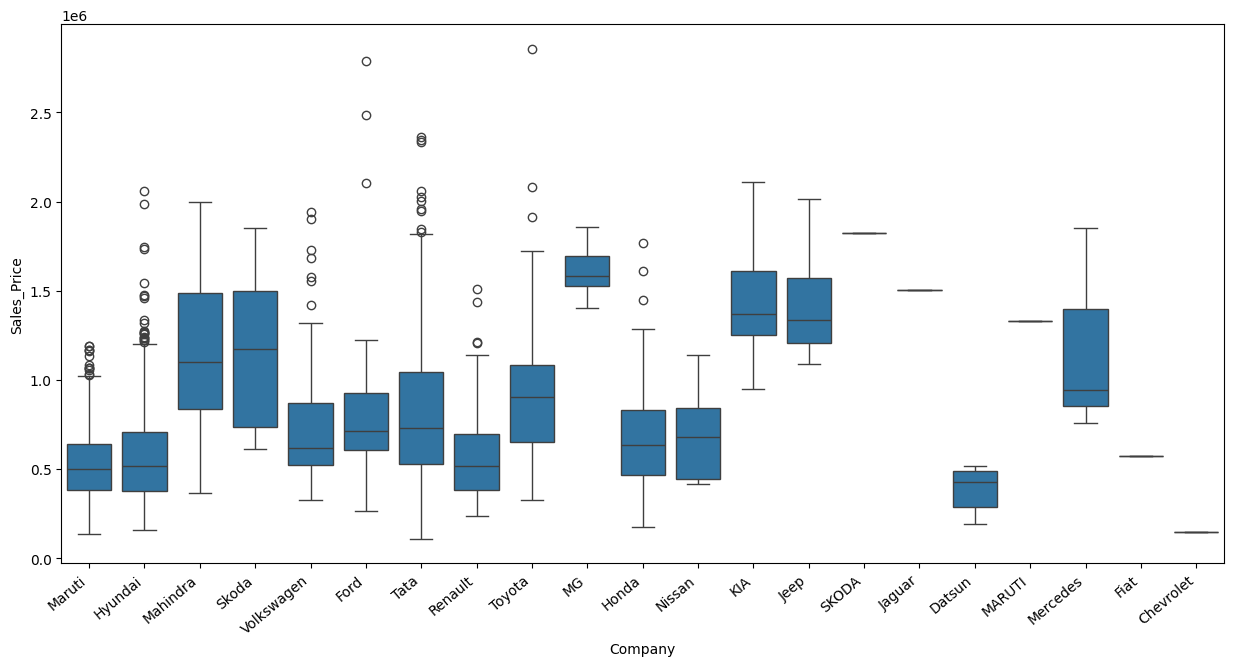

In [8]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Company',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Sales Price

In [9]:
import warnings
warnings.filterwarnings('ignore')

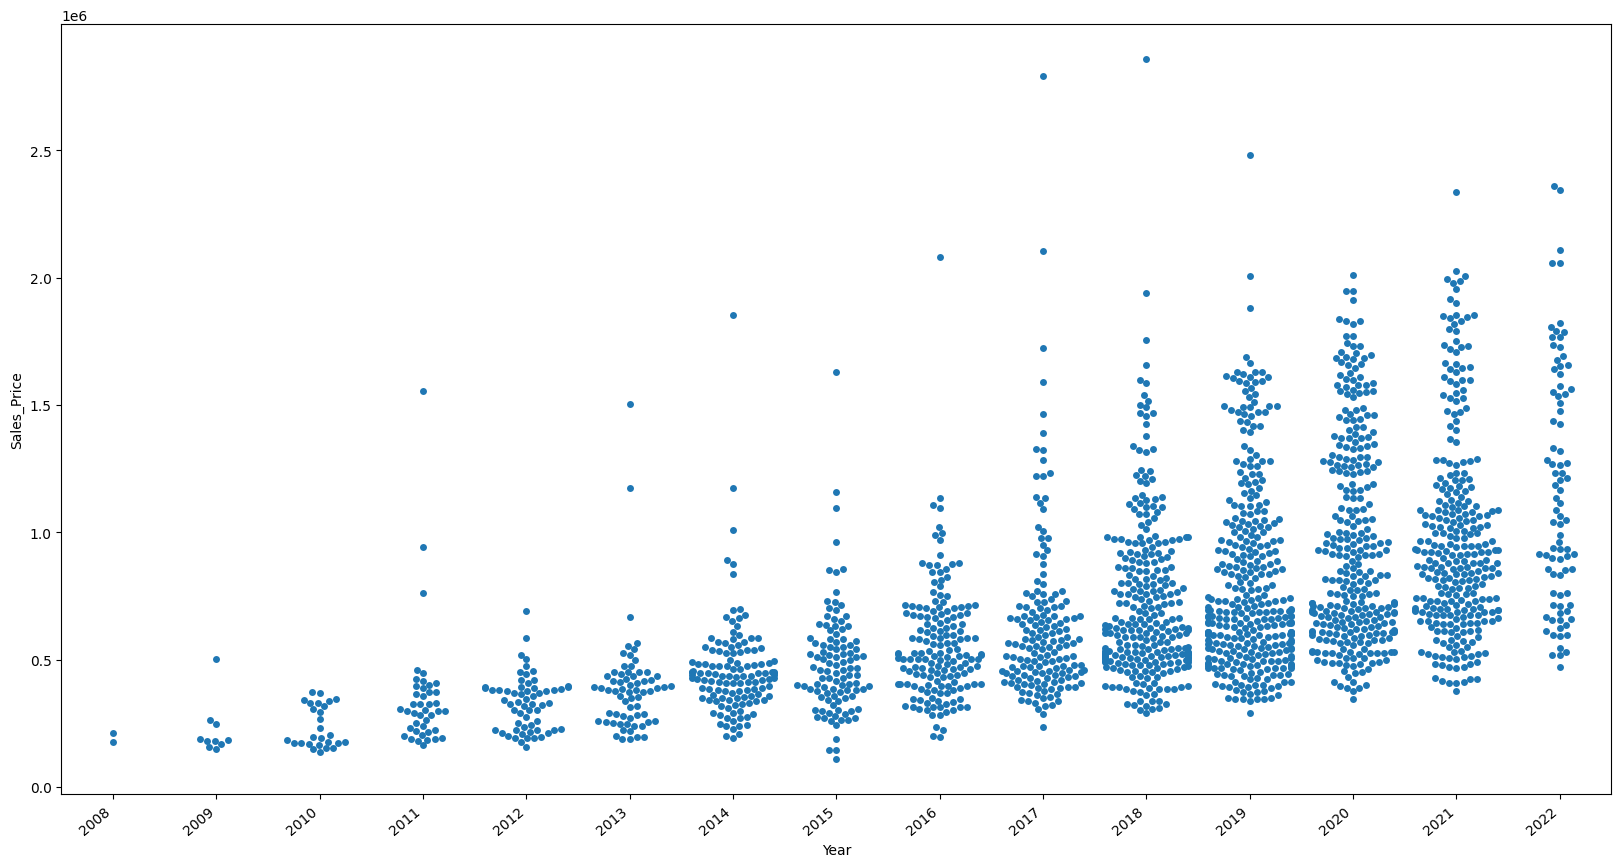

In [10]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of KM_Driven with Sales Price

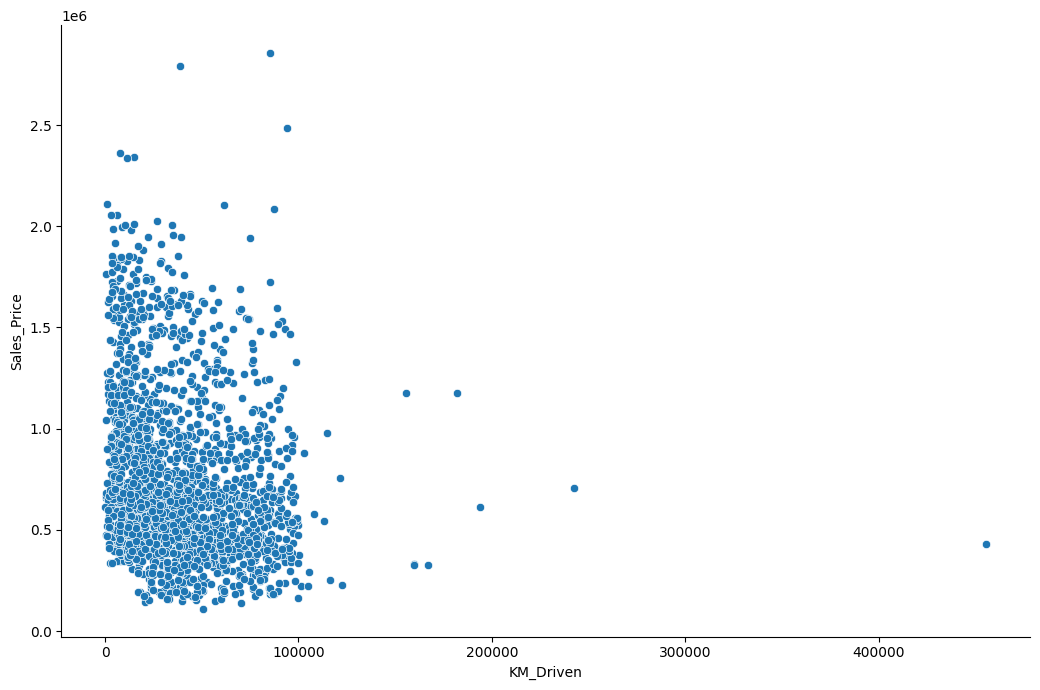

In [11]:
sns.relplot(x='KM_Driven',y='Sales_Price',data=cars,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Sales Price

<Axes: xlabel='Fuel_Type', ylabel='Sales_Price'>

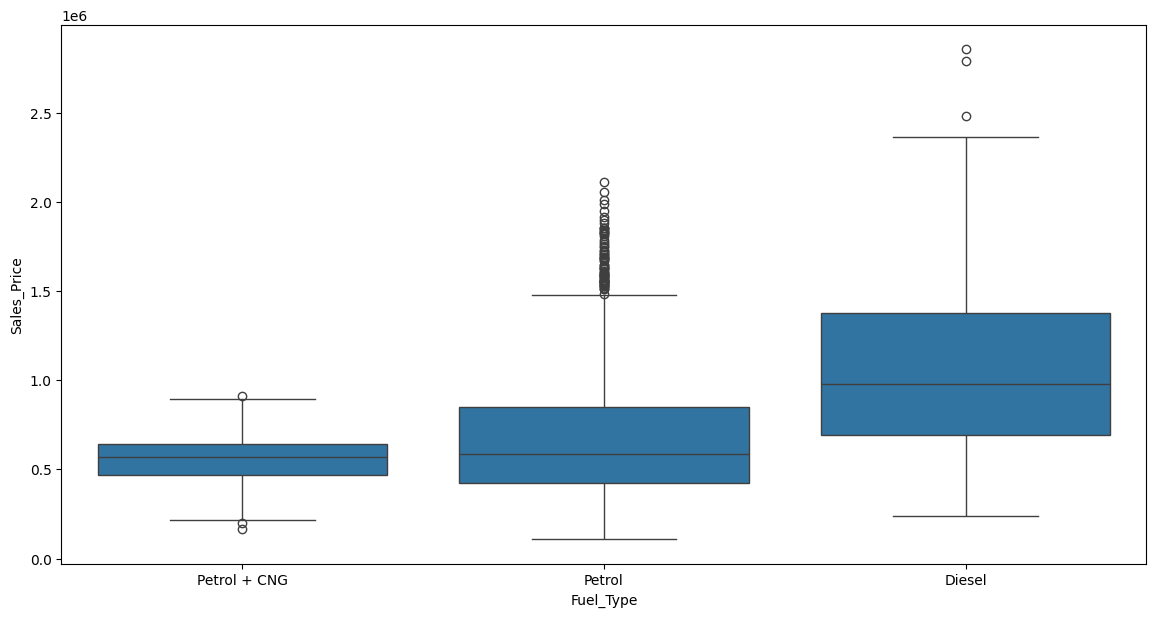

In [12]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Sales_Price',data=cars)

### Relationship of Sales Price with FuelType, Year and Company mixed

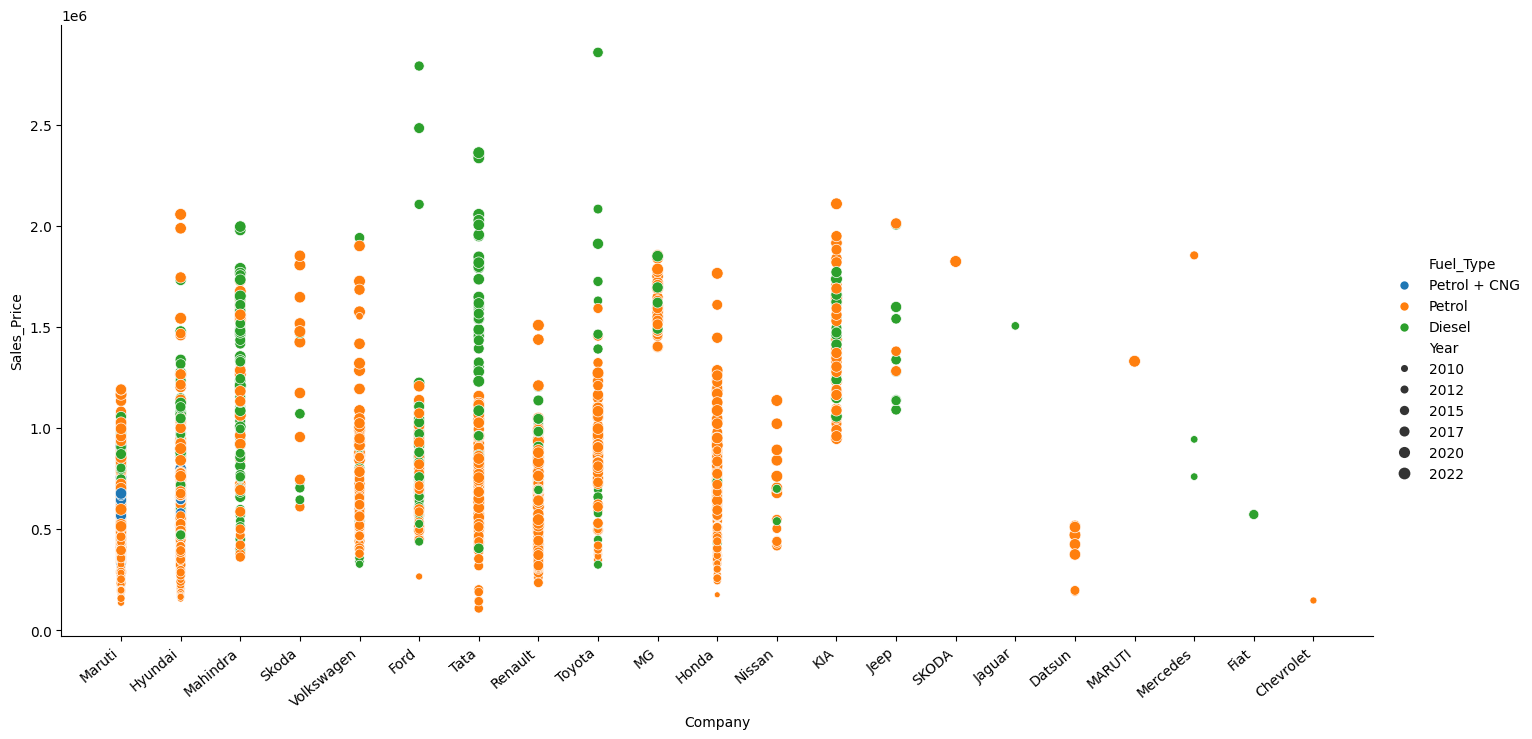

In [13]:
ax=sns.relplot(x='Company',y='Sales_Price',data=cars,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Checking relationship of EMI with Sales Price for hue as Company

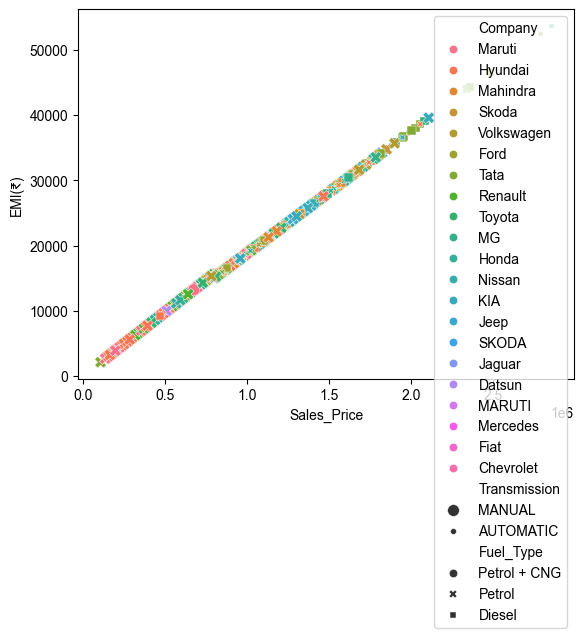

In [14]:
sns.scatterplot (x= "Sales_Price" , y = "EMI(₹)" , hue = "Company" , style = "Fuel_Type" , size = "Transmission" , data = cars   )
sns.set(rc= {'figure.figsize' :(25.7 , 12.27)})

# Model Building:

## 1. Linear Regression:


### Extracting Training Data

In [15]:
x=cars[['Name','Company','Transmission','Year','KM_Driven','Fuel_Type','City']]
y=cars['Sales_Price']

In [16]:
x

,Name,Company,Transmission,Year,KM_Driven,Fuel_Type,City
0,Maruti New Wagon-R LXI CNG 1.0 L,Maruti,MANUAL,2020,20724,Petrol + CNG,New Delhi
1,Maruti Celerio ZXI OPT AMT,Maruti,AUTOMATIC,2017,87848,Petrol,Hyderabad
2,Hyundai i10 ERA 1.1 IRDE,Hyundai,MANUAL,2010,60476,Petrol,Kochi
3,Maruti Alto 800 LXI,Maruti,MANUAL,2013,40700,Petrol,Chennai
4,Mahindra XUV 3OO W8 (O) AT,Mahindra,MANUAL,2021,4022,Petrol,Pune
...,...,...,...,...,...,...,...
2026,Renault Duster RXZ CVT 1.3 TURBO,Renault,AUTOMATIC,2021,10821,Petrol,New Delhi
2027,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,KIA,MANUAL,2022,1114,Petrol,Bangalore
2028,Volkswagen Polo HIGH LINE PLUS 1.0,Volkswagen,MANUAL,2020,17595,Petrol,Pune
2029,Renault TRIBER 1.0 RXZ,Renault,MANUAL,2020,33419,Petrol,Hyderabad


In [17]:
y.shape

(2031,)

### Applying Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [20]:
OHE = OneHotEncoder()
OHE.fit(x[['Name', 'Company', 'Transmission', 'Fuel_Type', 'City']])

OneHotEncoder()

In [21]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=OHE.categories_), ['Name', 'Company', 'Transmission', 'Fuel_Type', 'City']),
    remainder='passthrough'
)

## Azure ML Pipeline Model :

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
pipe = make_pipeline(column_trans,lr)

In [25]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Chevrolet Beat LS PETROL', 'Datsun Go Plus T (O) CVT',
       'Datsun Go T', 'Datsun Redi Go 1.0 T(O)', 'Datsun Redi Go T (O)',
       'Fiat URBAN CROSS EMOTION MULTIJET 1.3',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM OPT',
       'F...
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object),
                                                                            array(['Ahmedabad', 'Bangalore', 'Chennai', 'Howrah', 'Hyderabad',
       'Indore', 'Jaipur', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'New Delhi', 'Pune'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'Transmission', 'Fuel_Type',
                                                   'City'])])),
                ('linearregression', LinearRegression())])

In [26]:
y_pred = pipe.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.7403683767703779

#### Finding the model with a random state of TrainTestSplit :

In [28]:
scores=[]
for i in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [29]:
np.argmax(scores)

np.int64(1985)

In [30]:
scores[np.argmax(scores)]

0.8662928612867161

## Actual Vs Predicted :

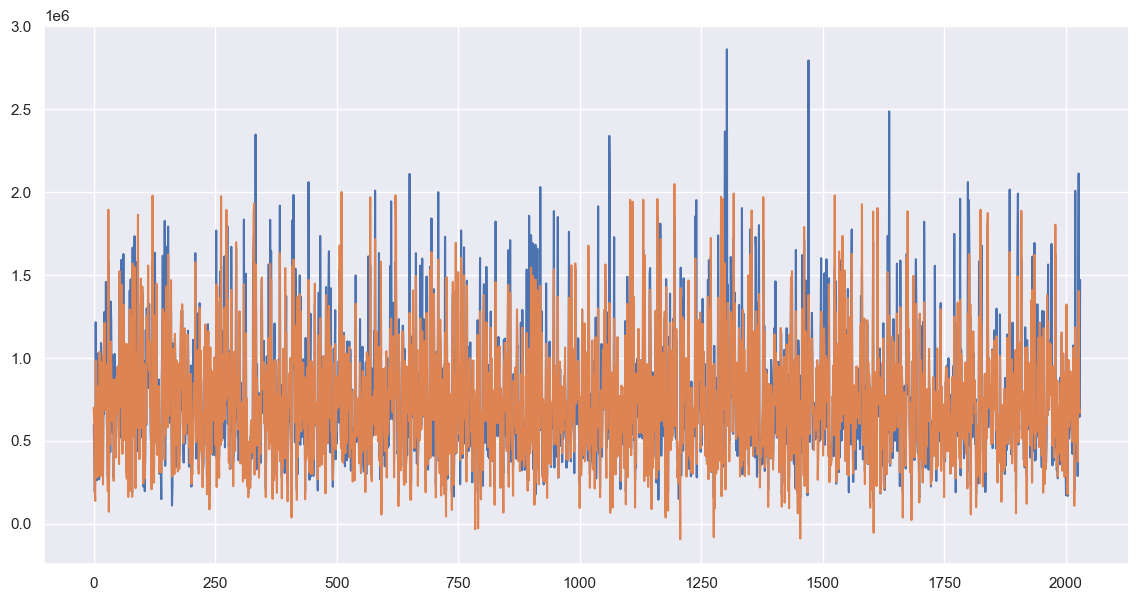

In [31]:
#Comparing original Data's Scatterplot with Regressed model
plt.subplots(figsize=(14,7))
plt.plot(cars.Sales_Price)
plt.plot(pipe.predict(cars))      
plt.show()

### From this model we can predict sales price of the future upcoming cars :

In [32]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Renault TRIBER 1.0 RXZ','Renault','MANUAL',2018,33419,'Petrol','Hyderabad']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [563494.31]


In [33]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Hyundai Creta 1.6 SX AT CRDI','Hyundai','AUTOMATIC',2015,17439,'Diesel','Bangalore']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1197323.78]


In [34]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE','KIA','MANUAL',2022,5842,'Diesel','Pune']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1518191.77]


In [35]:
import pickle

In [38]:
pickle.dump(pipe,open('RegressionModel.pkl','wb'))

In [37]:
#pip freeze

#### Inference : From above 6 models we choose the Linear Regression Pipeline Model for Deployment which is giving highest accuracy i.e. 92.63%